# Web Scraping

## Structure
1. HTML pages
2. Chrome DevTools
3. Web scraping packages
    * BeautifulSoup
        * Wuzzuf Exercise
        * Amazon Exercise
        * Visualizing some data
4. Ethical considerations of web scraping

## What you will be able to do after the tutorial
* Inspect an HTML page and identify which parts you want to scrape.
* Scrape web pages with `requests` and `BeautifulSoup`.
* Judge when web scraping is the most suitable approach and what you should consider before doing so (be a good citizen of the Internet).

## HTML page structure

**Hypertext Markup Language (HTML)** is the standard markup language for documents designed to be displayed in a web browser. HTML describes the structure of a web page and it can be used with **Cascading Style Sheets (CSS)** and a scripting language such as **JavaScript** to create interactive websites. HTML consists of a series of elements that "tell" to the browser how to display the content. Lastly, elements are represented by **tags**.

Here are some tags:
* `<!DOCTYPE html>` declaration defines this document to be HTML5.  
* `<html>` element is the root element of an HTML page.  
* `<div>` tag defines a division or a section in an HTML document. It's usually a container for other elements.
* `<head>` element contains meta information about the document.  
* `<title>` element specifies a title for the document.  
* `<body>` element contains the visible page content.  
* `<h1>` element defines a large heading.  
* `<p>` element defines a paragraph.  
* `<a>` element defines a hyperlink.

HTML tags normally come in pairs like `<p>` and `</p>`. The first tag in a pair is the opening tag, the second tag is the closing tag. The end tag is written like the start tag, but with a slash inserted before the tag name.

<img src="./figures/Web-Scraping/tags.png" width="512">

HTML has a tree-like 🌳 🌲 structure thanks to the **Document Object Model (DOM)**, a cross-platform and language-independent interface. Here's how a very simple HTML tree looks like.

<img src="./figures/Web-Scraping/dom_tree.gif">

### Creating a simple HTML page

## Web Scraping with `requests` and `BeautifulSoup`



### What is `BeautifulSoup`?

It is a Python library for pulling data out of HTML and XML files. It provides methods to navigate the document's tree structure that we discussed before and scrape its content.

### Our pipeline
<img src='./figures/Web-Scraping/scrape-pipeline.png' width="1024">

In [1]:
!pip install lxml

In [6]:
# Imports
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
%matplotlib inline

In [3]:
# Wuzzuf's homepage
wuzzuf_url = 'https://wuzzuf.net/search/jobs/?q=python+&a=hpb'

# Use requests to retrieve data from a given URL
wuzzuf_response = requests.get(wuzzuf_url)

# Parse the whole HTML page using BeautifulSoup
wuzzuf_soup = BeautifulSoup(wuzzuf_response.content, 'lxml')

# # Title of the parsed page
# wuzzuf_soup.title
print(wuzzuf_soup.prettify()[:2000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport"/>
  <title data-react-helmet="true">
   Job Search | WUZZUF
  </title>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services." data-react-helmet="true" name="description"/>
  <meta content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employment in egypt, Egypt jobs, jobs vacancies, job vacancies in egypt, job search egypt, job vacancies egypt, job recruitment in egypt, job opportunities in egypt, jobs cairo, job vacancy egypt , وظائف مصر" data-react-helmet="true" name="keywords"/>
  <meta content="Jobs in Egypt | WUZZUF" data-react-helmet="true" property="og:ti

In [4]:
# We can also get it without the HTML tags
wuzzuf_soup.title.string[:20]

'Job Search | WUZZUF'

### Collect Jobs info

In [5]:
job = wuzzuf_soup.find('div', {'class': 'css-pkv5jc'})
print(job.prettify()[:2000])

<div class="css-pkv5jc">
 <a href="https://wuzzuf.net/jobs/careers/Accept-Payment-Solutions-Egypt-43747">
  <style data-emotion="css 1tbr236">
   .css-1tbr236{position:absolute;right:0;top:0;width:60px;height:60px;object-fit:contain;object-position:center center;}
  </style>
  <img alt="Jobs and Careers at Paymob Solutions Egypt" class="css-1tbr236" src="https://images.wuzzuf-data.net/files/company_logo/Paymob-Solutions-Egypt-43747-1601215347.png"/>
 </a>
 <style data-emotion="css laomuu">
  .css-laomuu{padding-right:60px;}
 </style>
 <div class="css-laomuu">
  <style data-emotion="css m604qf">
   .css-m604qf{font-size:16px;font-weight:600;font-style:normal;letter-spacing:-0.4px;line-height:24px;color:#0055D9;margin:0;}
  </style>
  <h2 class="css-m604qf">
   <style data-emotion="css o171kl">
    .css-o171kl{-webkit-text-decoration:none;text-decoration:none;color:inherit;}
   </style>
   <a class="css-o171kl" href="https://wuzzuf.net/jobs/p/PJpOR0VR3Waj-Senior-Software-Engineer---Pytho

In [6]:
job_title = job.find('h2').a.text
job_title 

'Senior Software Engineer - Python\\Django'

In [7]:
requirements = job.find('div' , {'class':'css-y4udm8'})
job_type = requirements.find('span', {'class':'css-1ve4b75'}).text
print(job_type)

Full time


In [8]:
all_divs = requirements.find_all('div')

In [9]:
skills = all_divs[1].find_all('a') #The Skills 
for skill in skills: 
  print(skill.text.strip().replace('· ',''))

Experienced
Python
Computer Science
Software Engineering
Framework
Software Development
AWS
Information Technology (IT)
javaScript
Web Services
ReactJS


### Collect Images

In [10]:

logo = job.find('img')
logo_url = logo['src']

logo_url


'https://images.wuzzuf-data.net/files/company_logo/Paymob-Solutions-Egypt-43747-1601215347.png'

In [11]:
jobs = wuzzuf_soup.find_all('div', {'class': 'css-pkv5jc'})
preferred_skill = input()

def include_skill(pref, skills): 
    
    for skill in skills: 
        if pref.lower() in skill.lower():
            return True
    return False
skill_arr = np.array([])
img_arr = np.array([])
type_arr = np.array([])
title_arr = np.array([])

for job in jobs: 
    
    
    job_title = job.find('h2').a.text
    
    requirements = job.find('div' , {'class':'css-y4udm8'})
    r1 = requirements.find('span', {'class':'css-1ve4b75'}).text
    all_divs = requirements.find_all('div')
    skills = all_divs[1].find_all('a')
    skills = [skill.text.strip().replace('· ','') for skill in skills]
    logo = job.find('img')
    logo_url = logo['src']
    if include_skill(preferred_skill,skills):
        print(f"""
        The job title is {job_title}
        It is a {r1} job
        The image link is {logo_url}
        The required skills are: 
            """)
        for skill in skills: 
            print(skill)
        print ('--------------------------------------------')
    title_arr = np.append(title_arr,job_title)
    img_arr = np.append(img_arr,logo_url)
    type_arr = np.append(type_arr,r1)
    skill_arr = np.append(skill_arr,str(skills))
    

data = pd.DataFrame(
    {'Job Title':title_arr,
     'Image URL':img_arr,
     'Job Type':type_arr,
     'Skills' : skill_arr
    }
)



 aws



        The job title is Senior Software Engineer - Python\Django
        It is a Full time job
        The image link is https://images.wuzzuf-data.net/files/company_logo/Paymob-Solutions-Egypt-43747-1601215347.png
        The required skills are: 
            
Experienced
Python
Computer Science
Software Engineering
Framework
Software Development
AWS
Information Technology (IT)
javaScript
Web Services
ReactJS
--------------------------------------------

        The job title is Senior Python Developer
        It is a Full time job
        The image link is https://images.wuzzuf-data.net/files/company_logo/ExaServe-LLC-Egypt-4028-1606635818.png
        The required skills are: 
            
Experienced
AWS
Computer Science
Docker
Git
OOP
Python
Software Development
Software Engineering
Information Technology (IT)
SQL
--------------------------------------------

        The job title is Senior Software Engineer (JavaEE /Python)
        It is a Full time job
        The image link is

### **Amazon Example**

In [7]:
url = f'https://www.amazon.eg/s?k=iphone&ref=nb_sb_noss_2'
url

'https://www.amazon.eg/s?k=iphone&ref=nb_sb_noss_2'

In [8]:
response= requests.get(url)
amazon_soup = BeautifulSoup(response.content,'lxml')
print(amazon_soup.prettify()[:1000])

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" dir="rtl" lang="ar-ae">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/7111VMgVVNL.css?AUIClients/AmazonRTL#language-ar.not-trident.rtl-true" rel="stylesheet"/>
  <script>
   (function(d,f,Q,D){function E(a){u&&u.tag&&u.tag(p(":","aui",a))}function r(a,b){u&&u.count&&u.count("aui:"+a,0===b?0:b||(u.count("aui:"+a)||0)+1)}function n(a){try{return a.test(navigator.userAgent)}c

In [19]:
import re 
items = amazon_soup.find_all('div',{'class':'a-section a-spacing-none'})
prices = np.array([])
titles = np.array([])

for item in items: 
   
    price = item.find('span',{'class':'a-price-whole'})
    if price is None:
        continue
    price = int(re.sub('[,.]','',price.text).strip('\u200e'))
    title = item.find('span',{'class':'a-size-base-plus a-color-base a-text-normal'}).text
    print(title)
    print(price)
    prices=np.append(prices,price)
    titles=np.append(titles,title)
df = pd.DataFrame({
    'Titles' :titles,
    'Prices':prices
})
    
df.head()


df1 = df[df.Prices>5000]

موبايل ابل ايفون 12، 128 جيجابايت، ذاكرة رام 4 جيجابايت، لون ازرق
15354
ايفون 12 برو ماكس 256 جيجابايت وذاكرة رام 6 جيجابايت من ابل، ازرق باسيفيك
21550
ابل ايفون 11 برو ماكس مع تطبيق فيس تايم - 256 جيجا، رام 4 جيجا، الجيل الرابع ال تي اي، اخضر داكن، شريحة واحدة و شريحة الاتصال الإلكتروني
18350
موبايل ابل ايفون 7 اس مع فيس تايم - 128 جيجابايت، الجيل الرابع ال تي اي، روز ذهبي، 4.7 بوصة
6311
ابل ايفون 11 الجديد (128 جيجابايت) - ابيض
12700
Apple Iphone XS Max With Facetime - 256 GB, 4G LTE, Space Grey, 4 GB Ram, Single Sim & E-Sim
13680
ايفون 12 برو 256 جيجابايت وذاكرة رام 6 جيجابايت من ابل، اللون ازرق فاتح - MGMD3J/A
19999
موبايل ابل ايفون XS بخاصية فيس تايم - 256 جيجابايت، 4G LTE، ذاكرة رام 4 جيجابايت، شريحة اتصال واحدة وشريحة مدمجة، ذهبي
12500
ابل ايفون 12 برو، 128 جيجابايت، ذاكرة رام 6 جيجابايت، لون ازرق فاتح
18845
ابل ايفون 11 مع فيس تايم - 128 جيجا، 4 جيجا رام، الجيل الرابع ال تي اي، اسود، شريحة واحدة و اتصال E-SIM - MHDH3AA\A
12700
ابل ايفون 11 مع تطبيق فيس تايم MHDM3J/A - سعة 128 ج

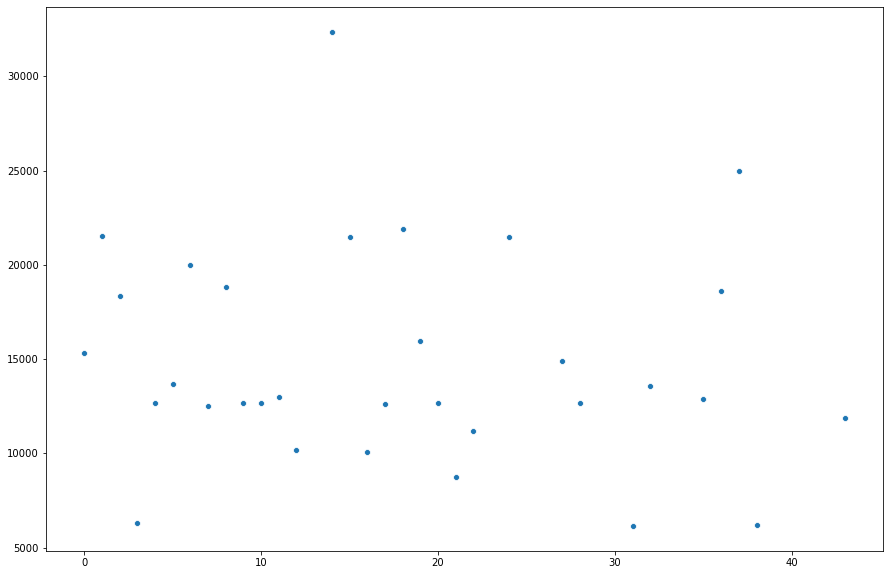

In [20]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.scatterplot(data=df1.Prices)

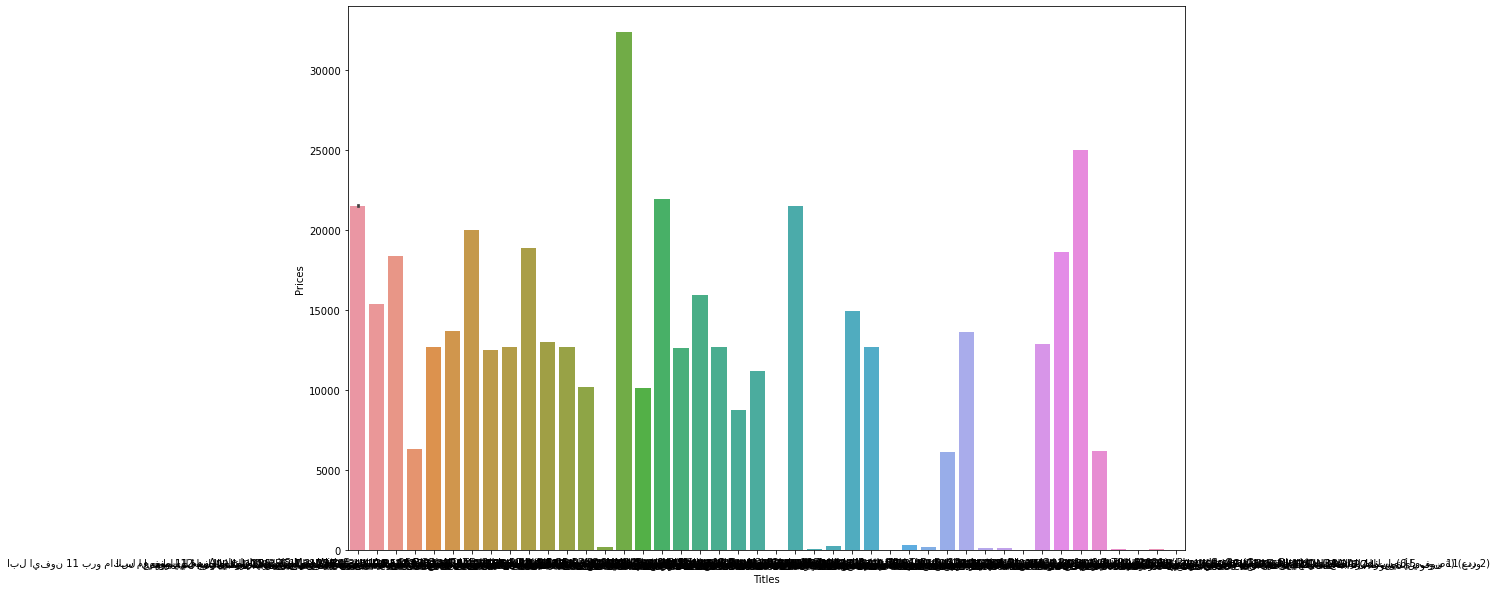

In [40]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(x= df.Titles, y=df.Prices)

## Advanced web scraping tools

**[Scrapy](https://scrapy.org)** is a Python framework for large scale web scraping. It gives you all the tools you need to efficiently extract data from websites, process them as you want, and store them in your preferred structure and format.

**[ARGUS](https://github.com/datawizard1337/ARGUS)** is an easy-to-use web mining tool that's built on Scrapy. It is able to crawl a broad range of different websites.

**[Selenium](https://selenium-python.readthedocs.io/index.html)** is an umbrella project encapsulating a variety of tools and libraries enabling web browser automation. Selenium specifically provides infrastructure for the W3C WebDriver specification — a platform and language-neutral coding interface compatible with all major web browsers. We can use it to imitate a user's behaviour and interact with Javascript elements (buttons, sliders etc.).

For now, let's see how Selenium works.

### How to install Selenium
1. If you are using Anaconda: `conda install -c conda-forge selenium `
2. Download the driver for your web browser for [here](https://selenium-python.readthedocs.io/installation.html#drivers). **Note:** Choose a driver that corresponds to your web browser's version. Unzip the file and move the executable to your working directory.

#### Important note on Selinium and web drivers
If you are running this notebook locally, follow the above steps and run the code directly below (change the path to where your web driver is located). If you are running this notebook on colab, skip the next cell and run the one below it.

### Scraping data with Selenium
We will use [UK's Yearly Box Office](https://www.boxofficemojo.com/intl/uk/yearly/) to scrape not only the top 100 but all the top movies of 2019. This will be our pipeline:

<img src='https://github.com/nestauk/im-tutorials/blob/3-ysi-tutorial/figures/Web-Scraping/selenium-pipeline.png?raw=1' width='1024'>

## Additional resources/references:

* [Document Object Model (DOM)](https://developer.mozilla.org/en-US/docs/Web/API/Document_Object_Model/Introduction)
* [HTML elements reference guide](https://www.w3schools.com/tags/default.asp)
* [About /robots.txt](https://www.robotstxt.org/robotstxt.html)
* [The robots.txt file](https://varvy.com/robottxt.html)
* [Ethics in Web Scraping](https://towardsdatascience.com/ethics-in-web-scraping-b96b18136f01)
* [On the Ethics of Web Scraping](http://robertorocha.info/on-the-ethics-of-web-scraping/)
* [User-Agent](https://en.wikipedia.org/wiki/User_agent)
* [BeautifulSoup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
* [Selinium Python - Unofficial documentation](https://selenium-python.readthedocs.io/)
* [ARGUS paper](http://ftp.zew.de/pub/zew-docs/dp/dp18033.pdf)
* [Brian's C. Keegan](http://www.brianckeegan.com/) excellent [5-week web scraping course](https://github.com/CU-ITSS/Web-Data-Scraping-S2019) intended for researchers in the social sciences and humanities.